In [1]:
!pip install pm4py

     |████████████████████████████████| 573kB 2.8MB/s 
     |████████████████████████████████| 40.6MB 102kB/s 
  Created wheel for ciso8601: filename=ciso8601-2.1.3-cp36-cp36m-linux_x86_64.whl size=28310 sha256=ca524f5df2baa67d6ddb1df9f38ac4fe4e727ce860d5b12c622871296aa8bbca
  Stored in directory: /root/.cache/pip/wheels/eb/32/e4/13bdaf7e245f82667b21e0cfb03d21224691a47fa9f9bc80a6
  Created wheel for stringdist: filename=StringDist-1.0.9-cp36-cp36m-linux_x86_64.whl size=24378 sha256=58c360f94fe4159ae9abed6aeb5c269e020f367997d6d64eff57f5e16321c358
  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built ciso8601 stringdist


# Loading Dataset

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/MSc Dissertation/Data/helpdesk.csv')

In [4]:
df.head()

,CaseID,ActivityID,CompleteTimestamp
0,2,1,2012-04-03 16:55:38
1,2,8,2012-04-03 16:55:53
2,2,6,2012-04-05 17:15:52
3,3,1,2010-10-29 18:14:06
4,3,8,2010-11-04 01:16:11


In [5]:
cols = ['case:concept:name','concept:name','time:timestamp']
df.columns = cols 
data = df
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])
data['concept:name'] = data['concept:name'].astype(str)
data.head()

,case:concept:name,concept:name,time:timestamp
0,2,1,2012-04-03 16:55:38
1,2,8,2012-04-03 16:55:53
2,2,6,2012-04-05 17:15:52
3,3,1,2010-10-29 18:14:06
4,3,8,2010-11-04 01:16:11


In [6]:
data.dtypes

case:concept:name             int64
concept:name                 object
time:timestamp       datetime64[ns]
dtype: object

# Convert to Event Log

In [0]:
from pm4py.objects.conversion.log import converter as log_converter

In [0]:
#parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'ORDER_NUMBER'}
#event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

In [0]:
event_log = log_converter.apply(data, variant=log_converter.Variants.TO_EVENT_LOG)

In [10]:
event_log

[{'attributes': {'concept:name': 2}, 'events': [{'concept:name': '1', 'time:timestamp': Timestamp('2012-04-03 16:55:38')}, '..', {'concept:name': '6', 'time:timestamp': Timestamp('2012-04-05 17:15:52')}]}, '....', {'attributes': {'concept:name': 4580}, 'events': [{'concept:name': '8', 'time:timestamp': Timestamp('2012-01-03 18:33:43')}, '..', {'concept:name': '6', 'time:timestamp': Timestamp('2012-01-11 02:07:40')}]}]

In [11]:
event_log[0]

{'attributes': {'concept:name': 2}, 'events': [{'concept:name': '1', 'time:timestamp': Timestamp('2012-04-03 16:55:38')}, '..', {'concept:name': '6', 'time:timestamp': Timestamp('2012-04-05 17:15:52')}]}

In [0]:
log = event_log

# Graphs Visualisation

In [0]:
from pm4py.statistics.attributes.log import get as attributes_filter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.statistics.traces.log import case_statistics
from pm4py.visualization.graphs import visualizer as graphs_visualizer

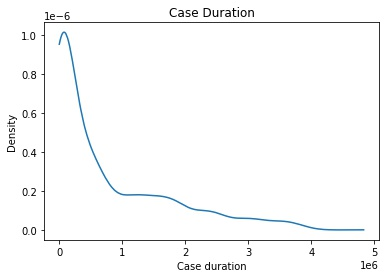

In [14]:
# visualize case duration graph
x_cases, y_cases = case_statistics.get_kde_caseduration(log)
graph_cases = graphs_visualizer.apply(x_cases, y_cases, variant=graphs_visualizer.Variants.CASES,parameters={graphs_visualizer.Variants.CASES.value.Parameters.FORMAT: "jpeg"})
graphs_visualizer.view(graph_cases)


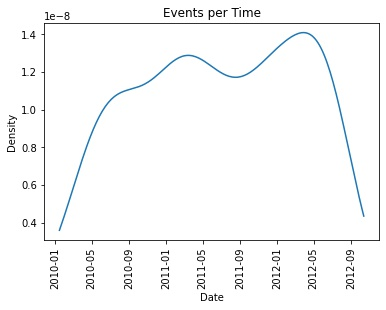

In [15]:
# # visualize events over time graph
x_dates, y_dates = attributes_filter.get_kde_date_attribute(log)
graph_dates = graphs_visualizer.apply(x_dates, y_dates, variant=graphs_visualizer.Variants.DATES,parameters={graphs_visualizer.Variants.DATES.value.Parameters.FORMAT: "jpeg"})
graphs_visualizer.view(graph_dates)

# Process Tree

In [0]:
from pm4py.objects.log.importer.xes import importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory
from pm4py.visualization.process_tree import visualizer as pt_visualizer

In [0]:
tree = inductive_miner.apply_tree(log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


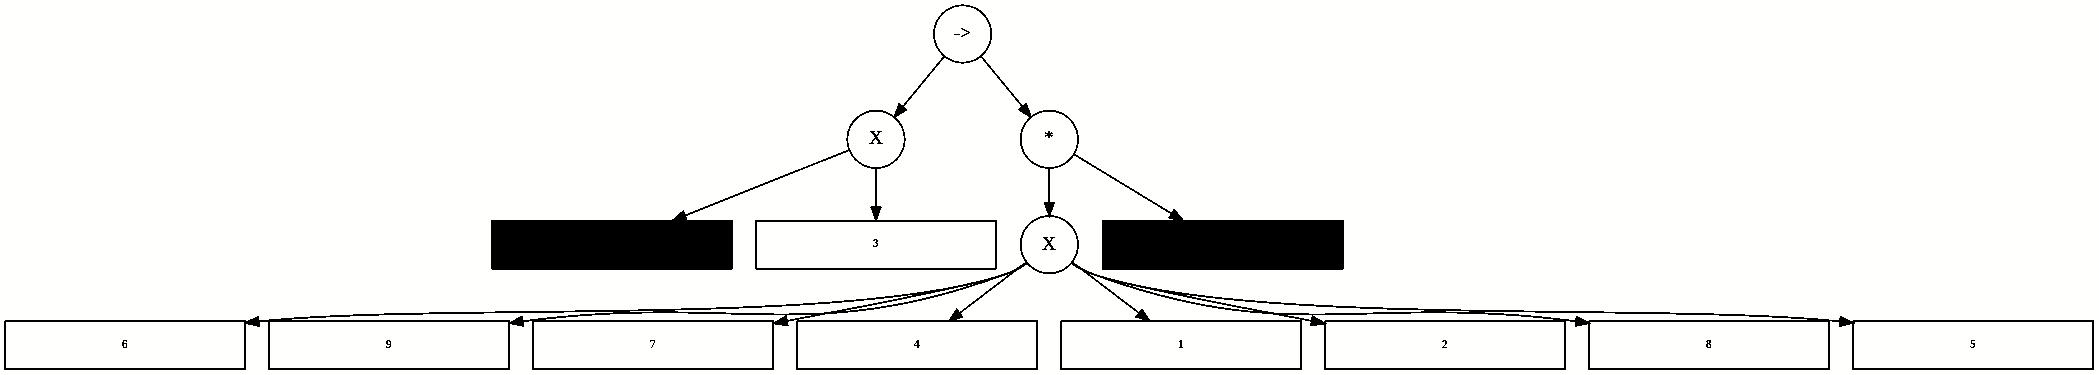

In [18]:
gviz1 = pt_vis_factory.apply(tree, parameters={"format": "jpeg"})
pt_vis_factory.view(gviz1)
pt_visualizer.save(gviz1,"process_tree_1.jpg")

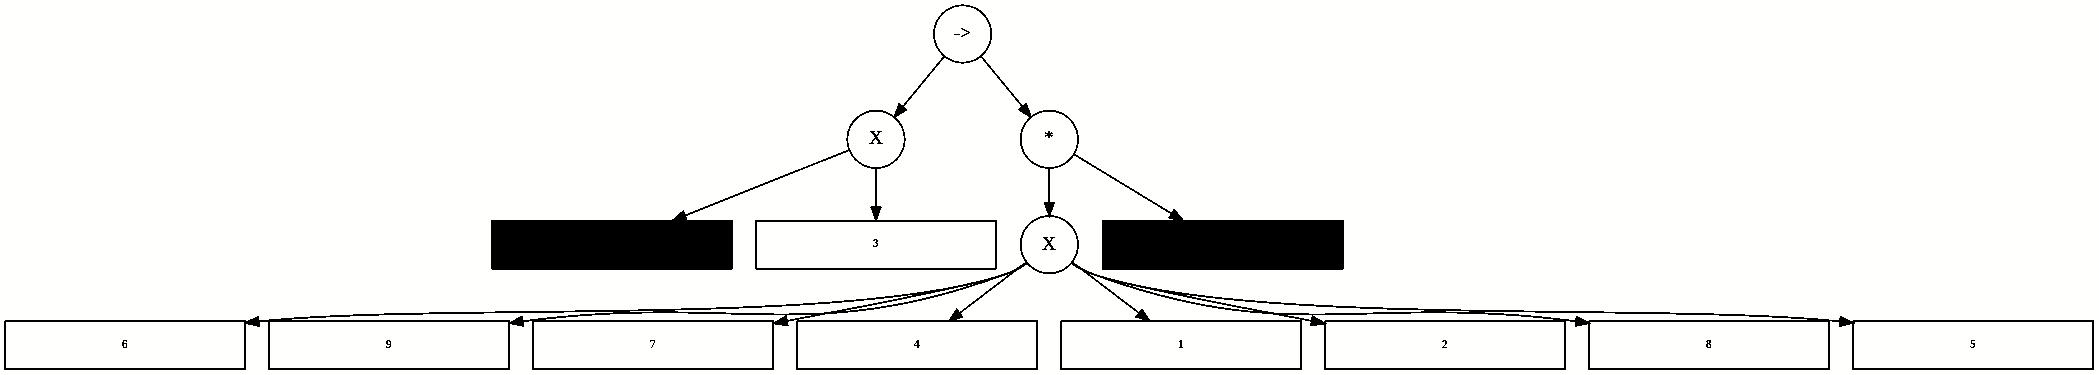

In [19]:
gviz2 = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "jpeg"})
pt_visualizer.view(gviz2)
pt_visualizer.save(gviz2,"process_tree_2.jpg")

# Align Table

In [0]:
from pm4py.objects.log.importer.xes import importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.visualization.align_table import visualizer

In [0]:
net, im, fm = inductive_miner.apply(log)

In [22]:
aligned_traces = alignments.apply(log, net, im, fm)
gviz = visualizer.apply(log, aligned_traces,parameters={visualizer.Variants.CLASSIC.value.Parameters.FORMAT: "jpeg"})
visualizer.view(gviz)
visualizer.save(gviz,"alignment_table.jpg")

Output hidden; open in https://colab.research.google.com to view.

# Alpha Miner

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_import
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petrinet import visualizer as pn_vis

In [0]:
net, i_m, f_m = alpha_miner.apply(log)

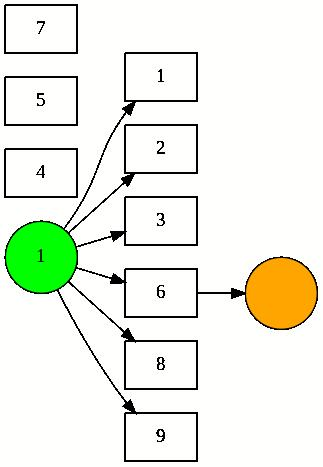

In [25]:
gviz = pn_vis.apply(net, i_m, f_m, parameters={pn_vis.Variants.WO_DECORATION.value.Parameters.FORMAT: "jpeg", pn_vis.Variants.WO_DECORATION.value.Parameters.DEBUG: False})
pn_vis.view(gviz)
pn_vis.save(gviz,"alpha_miner.jpg")

# Directly-Follows Graphs

Directly-Follows graphs are graphs where the nodes represent the events/activities in the log and directed edges are present between nodes if there is at least a trace in the log where the source event/activity is followed by the target event/activity.

In [0]:
from pm4py.algo.discovery.dfg import algorithm as dfg_algorithm
from pm4py.objects.conversion.dfg import converter as dfg_conv
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.visualization.dfg import visualizer as dfg_vis_fact
from pm4py.visualization.petrinet import visualizer as pn_vis

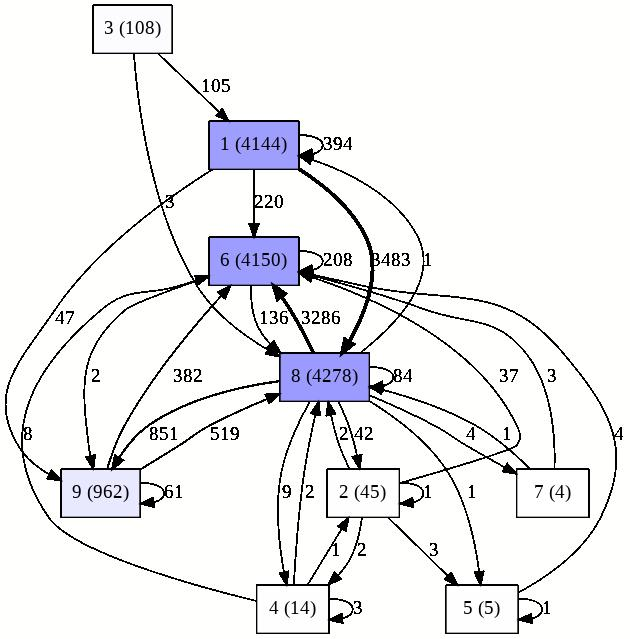

In [27]:
dfg = dfg_algorithm.apply(log)
dfg_gv = dfg_vis_fact.apply(dfg, log, parameters={dfg_vis_fact.Variants.FREQUENCY.value.Parameters.FORMAT: "jpeg"})
dfg_vis_fact.view(dfg_gv)
dfg_vis_fact.save(dfg_gv,"dfg_1.jpg")

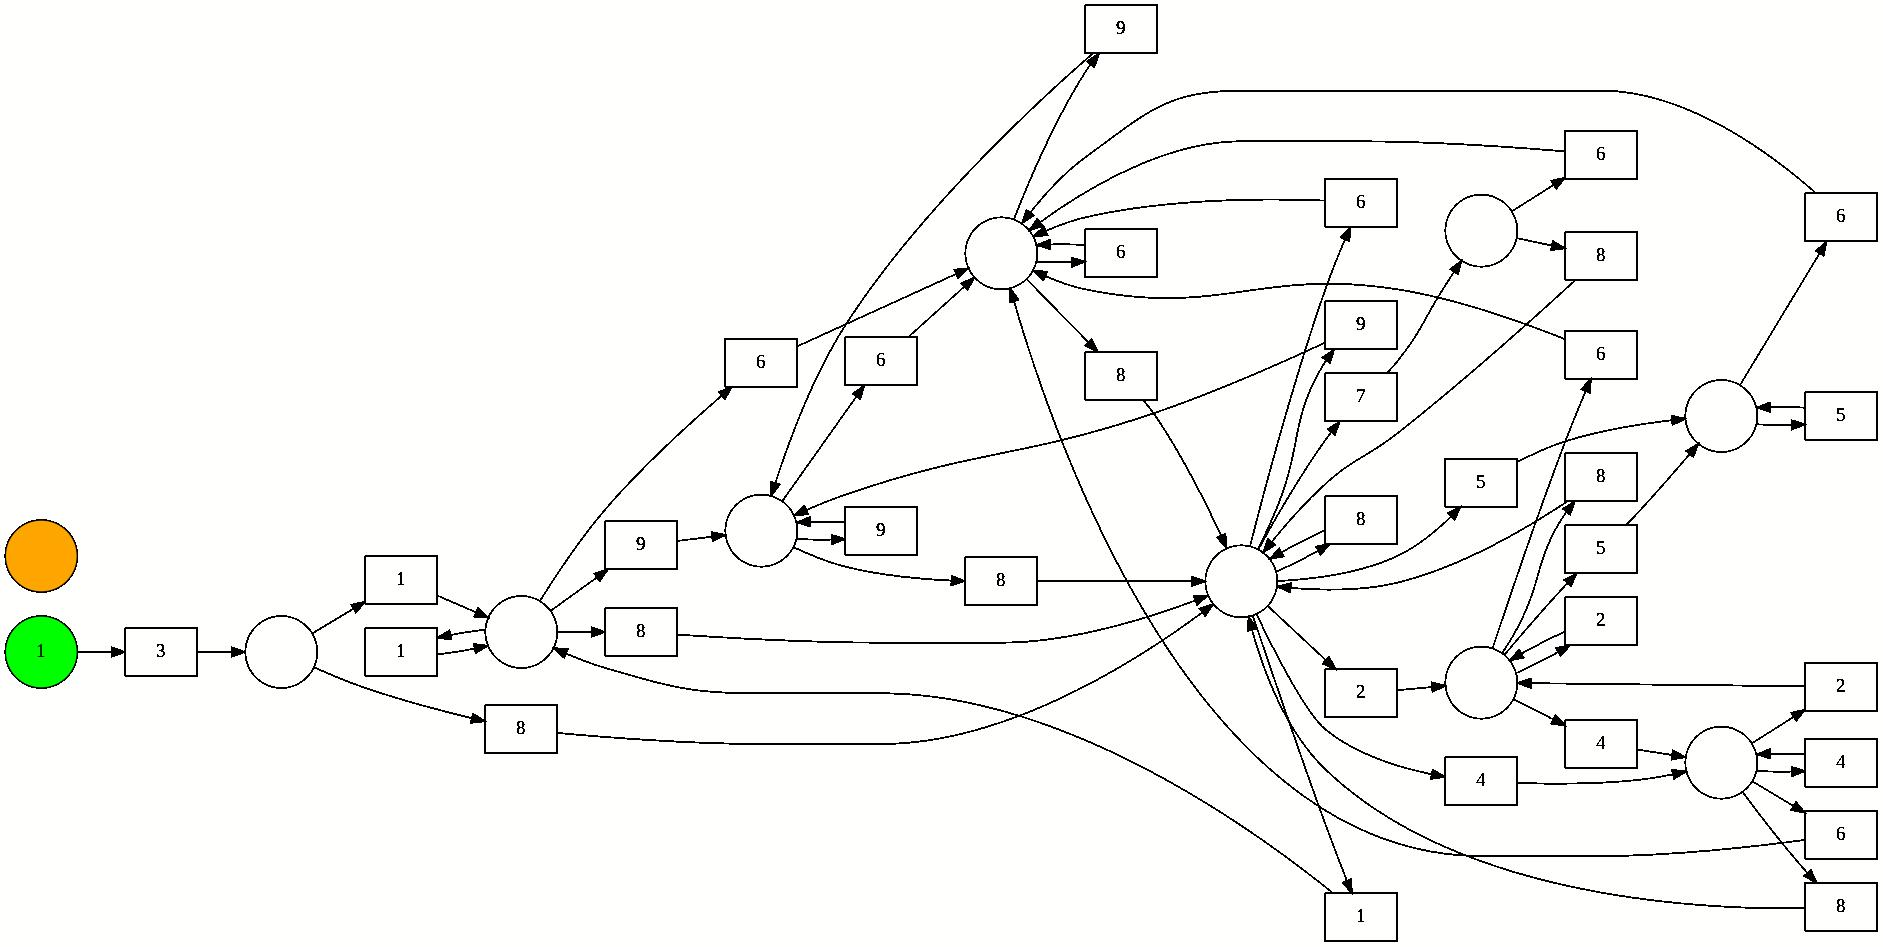

In [28]:
net, im, fm = dfg_conv.apply(dfg)
gviz = pn_vis.apply(net, im, fm, parameters={pn_vis.Variants.WO_DECORATION.value.Parameters.FORMAT: "jpeg"})
pn_vis.view(gviz)
pn_vis.save(gviz,"dfg_2.jpg")

# Event Log Filter

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import func

In [30]:
print(len(log))
log2 = func.filter_(lambda x: len(x) > 5, log)
print(type(log2))
print(len(log2))

3804
<class 'pm4py.objects.log.log.EventLog'>
263


# Event Log Map

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import func
from pm4py.objects.log.log import Trace

In [0]:
def new_trace(t):
  t2 = Trace()
  t2.append(t[0])
  return t2

In [33]:
print([len(x) for x in log])

log2 = func.map_(lambda x: new_trace(x), log)
print(type(log2))
print([len(x) for x in log2])
print([[y["concept:name"] for y in x] for x in log2])
print(log2)

[3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3, 2, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 6, 4, 2, 3, 4, 5, 3, 2, 7, 3, 3, 3, 4, 3, 3, 2, 1, 4, 2, 3, 3, 6, 3, 3, 4, 7, 5, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 7, 3, 3, 5, 3, 7, 3, 4, 3, 3, 3, 3, 4, 3, 3, 5, 3, 5, 3, 3, 3, 4, 4, 4, 3, 7, 3, 4, 3, 3, 7, 3, 3, 4, 3, 6, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 3, 6, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 5, 4, 3, 3, 4, 3, 3, 7, 3, 4, 3, 2, 3, 3, 3, 3, 5, 5, 3, 3, 3, 2, 3, 2, 4, 3, 4, 3, 7, 5, 4, 3, 2, 4, 4, 2, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 4, 4, 3, 3, 3, 3, 3, 4, 2, 6, 5, 4, 3, 3, 3, 4, 3, 6, 2, 7, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 7, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 5, 4, 3, 5, 3, 6, 5, 2, 4, 3, 3, 5, 5, 5, 3, 3, 3, 4, 4, 2, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 5, 3, 7, 4, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 5, 4, 3, 3, 3, 5, 4, 3, 4, 3, 5, 3, 3, 4, 

# Event Stream Filter

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter
from pm4py.objects.log.util import func

In [35]:
stream = converter.apply(log, variant=converter.Variants.TO_EVENT_STREAM)
print([x["concept:name"] for x in stream])

# keeps only events having register request as activity
stream2 = func.filter_(lambda e: e["concept:name"] == "Order Created", stream)
print(type(stream2))
print([x["concept:name"] for x in stream2])

['1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '8', '6', '1', '8', '6', '1', '8', '6', '3', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '9', '6', '1', '8', '6', '1', '8', '6', '1', '8', '9', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '6', '1', '8', '6', '1', '8', '6', '6', '8', '9', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '3', '1', '8', '6', '1', '8', '9', '6', '1', '8', '6', '6', '1', '8', '9', '6', '1', '8', '6', '1', '8', '9', '9', '8', '6', '1', '8', '9', '6', '1', '6', '1', '8', '6', '1', '8', '6', '6', '1', '8', '9', '8', '6', '1', '8', '6', '1', '6', '1', '1', '9', '8', '9', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '6', '1', '8', '9', '6', '1', '8', '6', '1', '8', '6', '1', '6', '6', '1', '1', '8', '6', '1', '6', '1', '8', '6', '1', '8', '6', '1',

# Event Stream Map

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter
from pm4py.objects.log.util import func

In [0]:
def add_underscore_to_resource(e):
  e["org:resource"] = e["org:resource"] + "_"
  return e

In [0]:
# stream = converter.apply(log, variant=converter.Variants.TO_EVENT_STREAM)

# # adds an underscore to each resource
# stream2 = func.map_(lambda e: add_underscore_to_resource(e), stream)
# print(type(stream2))
# print([e["org:resource"] for e in stream2])

# Heuristic Miner

In [0]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.visualization.heuristics_net import visualizer as hn_vis
from pm4py.visualization.petrinet import visualizer as petri_vis

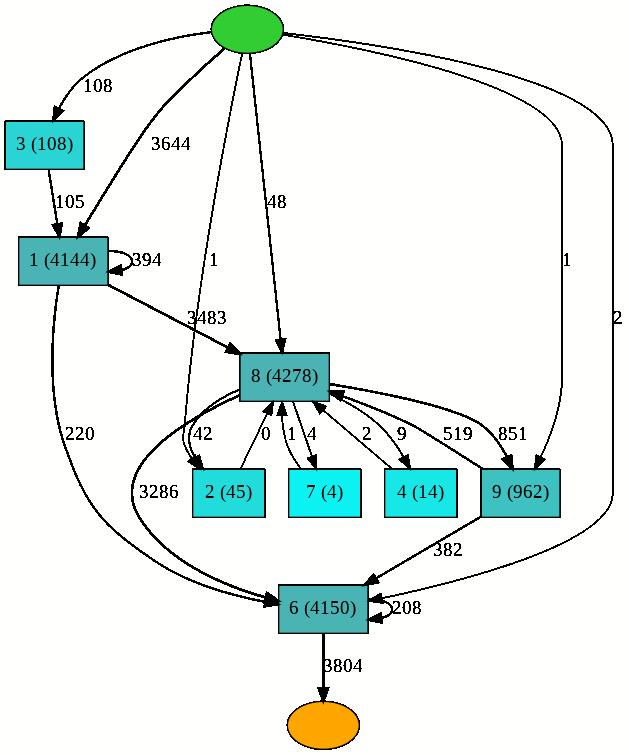

In [40]:
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

gviz = hn_vis.apply(heu_net, parameters={hn_vis.Variants.PYDOTPLUS.value.Parameters.FORMAT: "jpeg"})
hn_vis.view(gviz)
hn_vis.save(gviz, "heuristic_1.jpg")

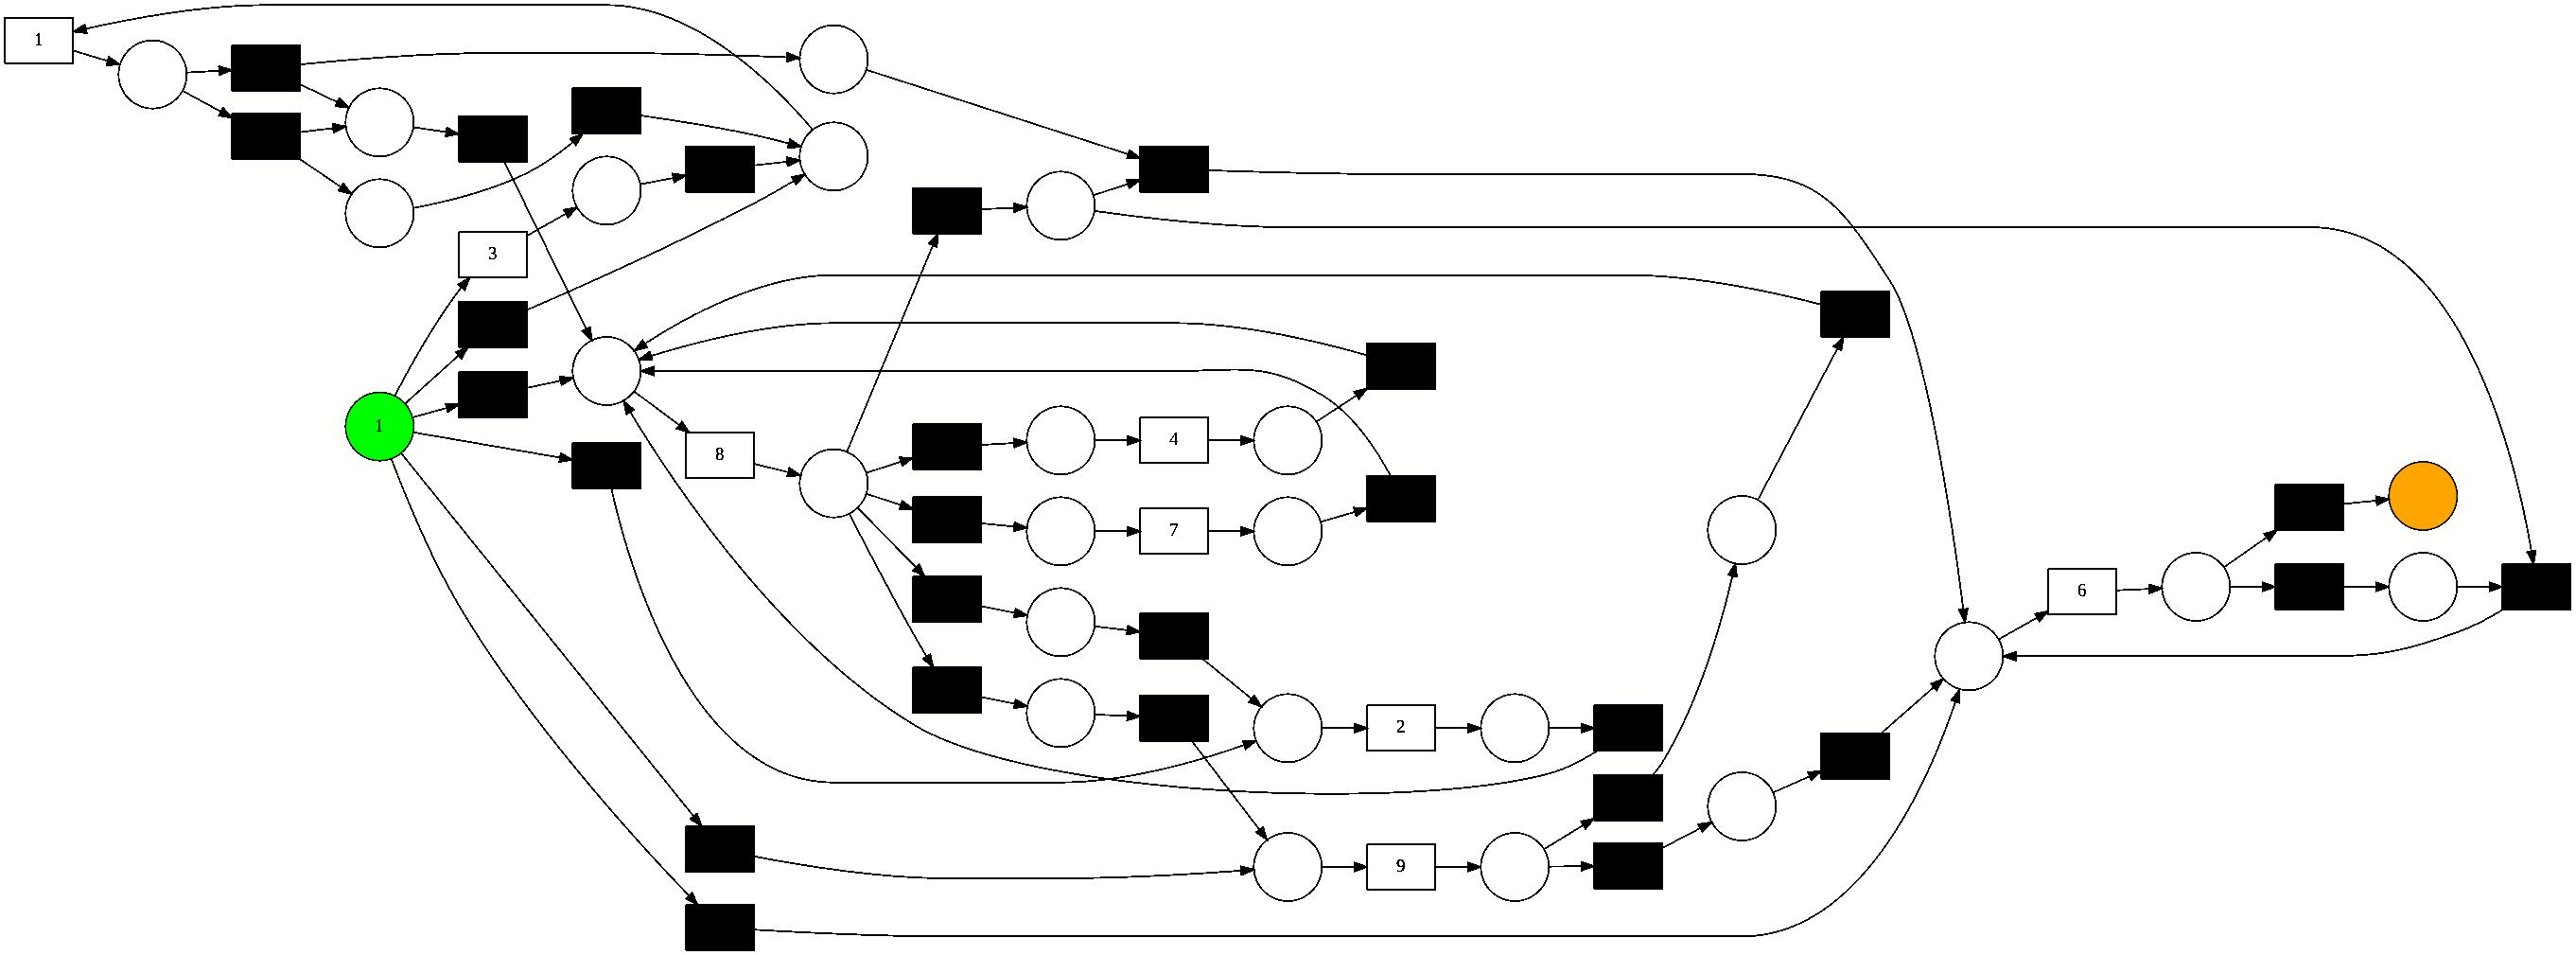

In [41]:
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz2 = petri_vis.apply(net, im, fm, parameters={petri_vis.Variants.WO_DECORATION.value.Parameters.FORMAT: "jpeg"})
petri_vis.view(gviz2)
petri_vis.save(gviz2,"heuristic_2.jpg")

# Log Skeleton

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.log_skeleton import algorithm as lsk
from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conf

In [43]:
log_skeleton = lsk.apply(log, parameters={lsk.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.01})
print(log_skeleton)

{'equivalence': {('7', '6')}, 'always_after': {('3', '8'), ('3', '6'), ('7', '6')}, 'always_before': {('7', '8'), ('7', '1')}, 'never_together': {('4', '5'), ('3', '2'), ('1', '7'), ('9', '5'), ('1', '2'), ('3', '7'), ('9', '2'), ('2', '7'), ('7', '2'), ('5', '9'), ('6', '4'), ('6', '2'), ('9', '4'), ('6', '5'), ('7', '3'), ('3', '5'), ('7', '5'), ('8', '7'), ('8', '2'), ('3', '4'), ('5', '7'), ('6', '7'), ('8', '4'), ('4', '7'), ('5', '3'), ('7', '4'), ('8', '5'), ('1', '5'), ('9', '7'), ('4', '3'), ('1', '4'), ('5', '4')}, 'directly_follows': set(), 'activ_freq': {'1': {0, 1, 2}, '8': {0, 1, 2, 3}, '6': {1, 2}, '3': {0, 1}, '9': {0, 1, 2}, '2': {0, 1}, '4': {0}, '5': {0}, '7': {0}}}


In [44]:
# applies conformance checking to it
results = lsk_conf.apply(log, log_skeleton)

for i in range(min(len(results), 5)):
  # print the i-the conformance checking
  print(results[i])

{'deviations': [], 'no_dev_total': 0, 'no_constr_total': 15, 'dev_fitness': 1.0, 'is_fit': True}
{'deviations': [], 'no_dev_total': 0, 'no_constr_total': 15, 'dev_fitness': 1.0, 'is_fit': True}
{'deviations': [], 'no_dev_total': 0, 'no_constr_total': 15, 'dev_fitness': 1.0, 'is_fit': True}
{'deviations': [], 'no_dev_total': 0, 'no_constr_total': 15, 'dev_fitness': 1.0, 'is_fit': True}
{'deviations': [], 'no_dev_total': 0, 'no_constr_total': 15, 'dev_fitness': 1.0, 'is_fit': True}


# Test Evaluation

In [0]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.evaluation import evaluator as general_evaluation
from pm4py.objects.log.importer.xes import importer as xes_importer

In [46]:
net, marking, final_marking = inductive_miner.apply(log)
metrics = general_evaluation.apply(log, net, marking, final_marking)
print("metrics=", metrics)

metrics= {'fitness': {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}, 'precision': 0.607521765182757, 'generalization': 0.8917564409443872, 'simplicity': 0.5789473684210527, 'metricsAverageWeight': 0.7695563936370492, 'fscore': 0.7558488828469314}


# Transition System

In [0]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.transition_system import algorithm as ts_discovery
from pm4py.visualization.transition_system import visualizer as ts_vis

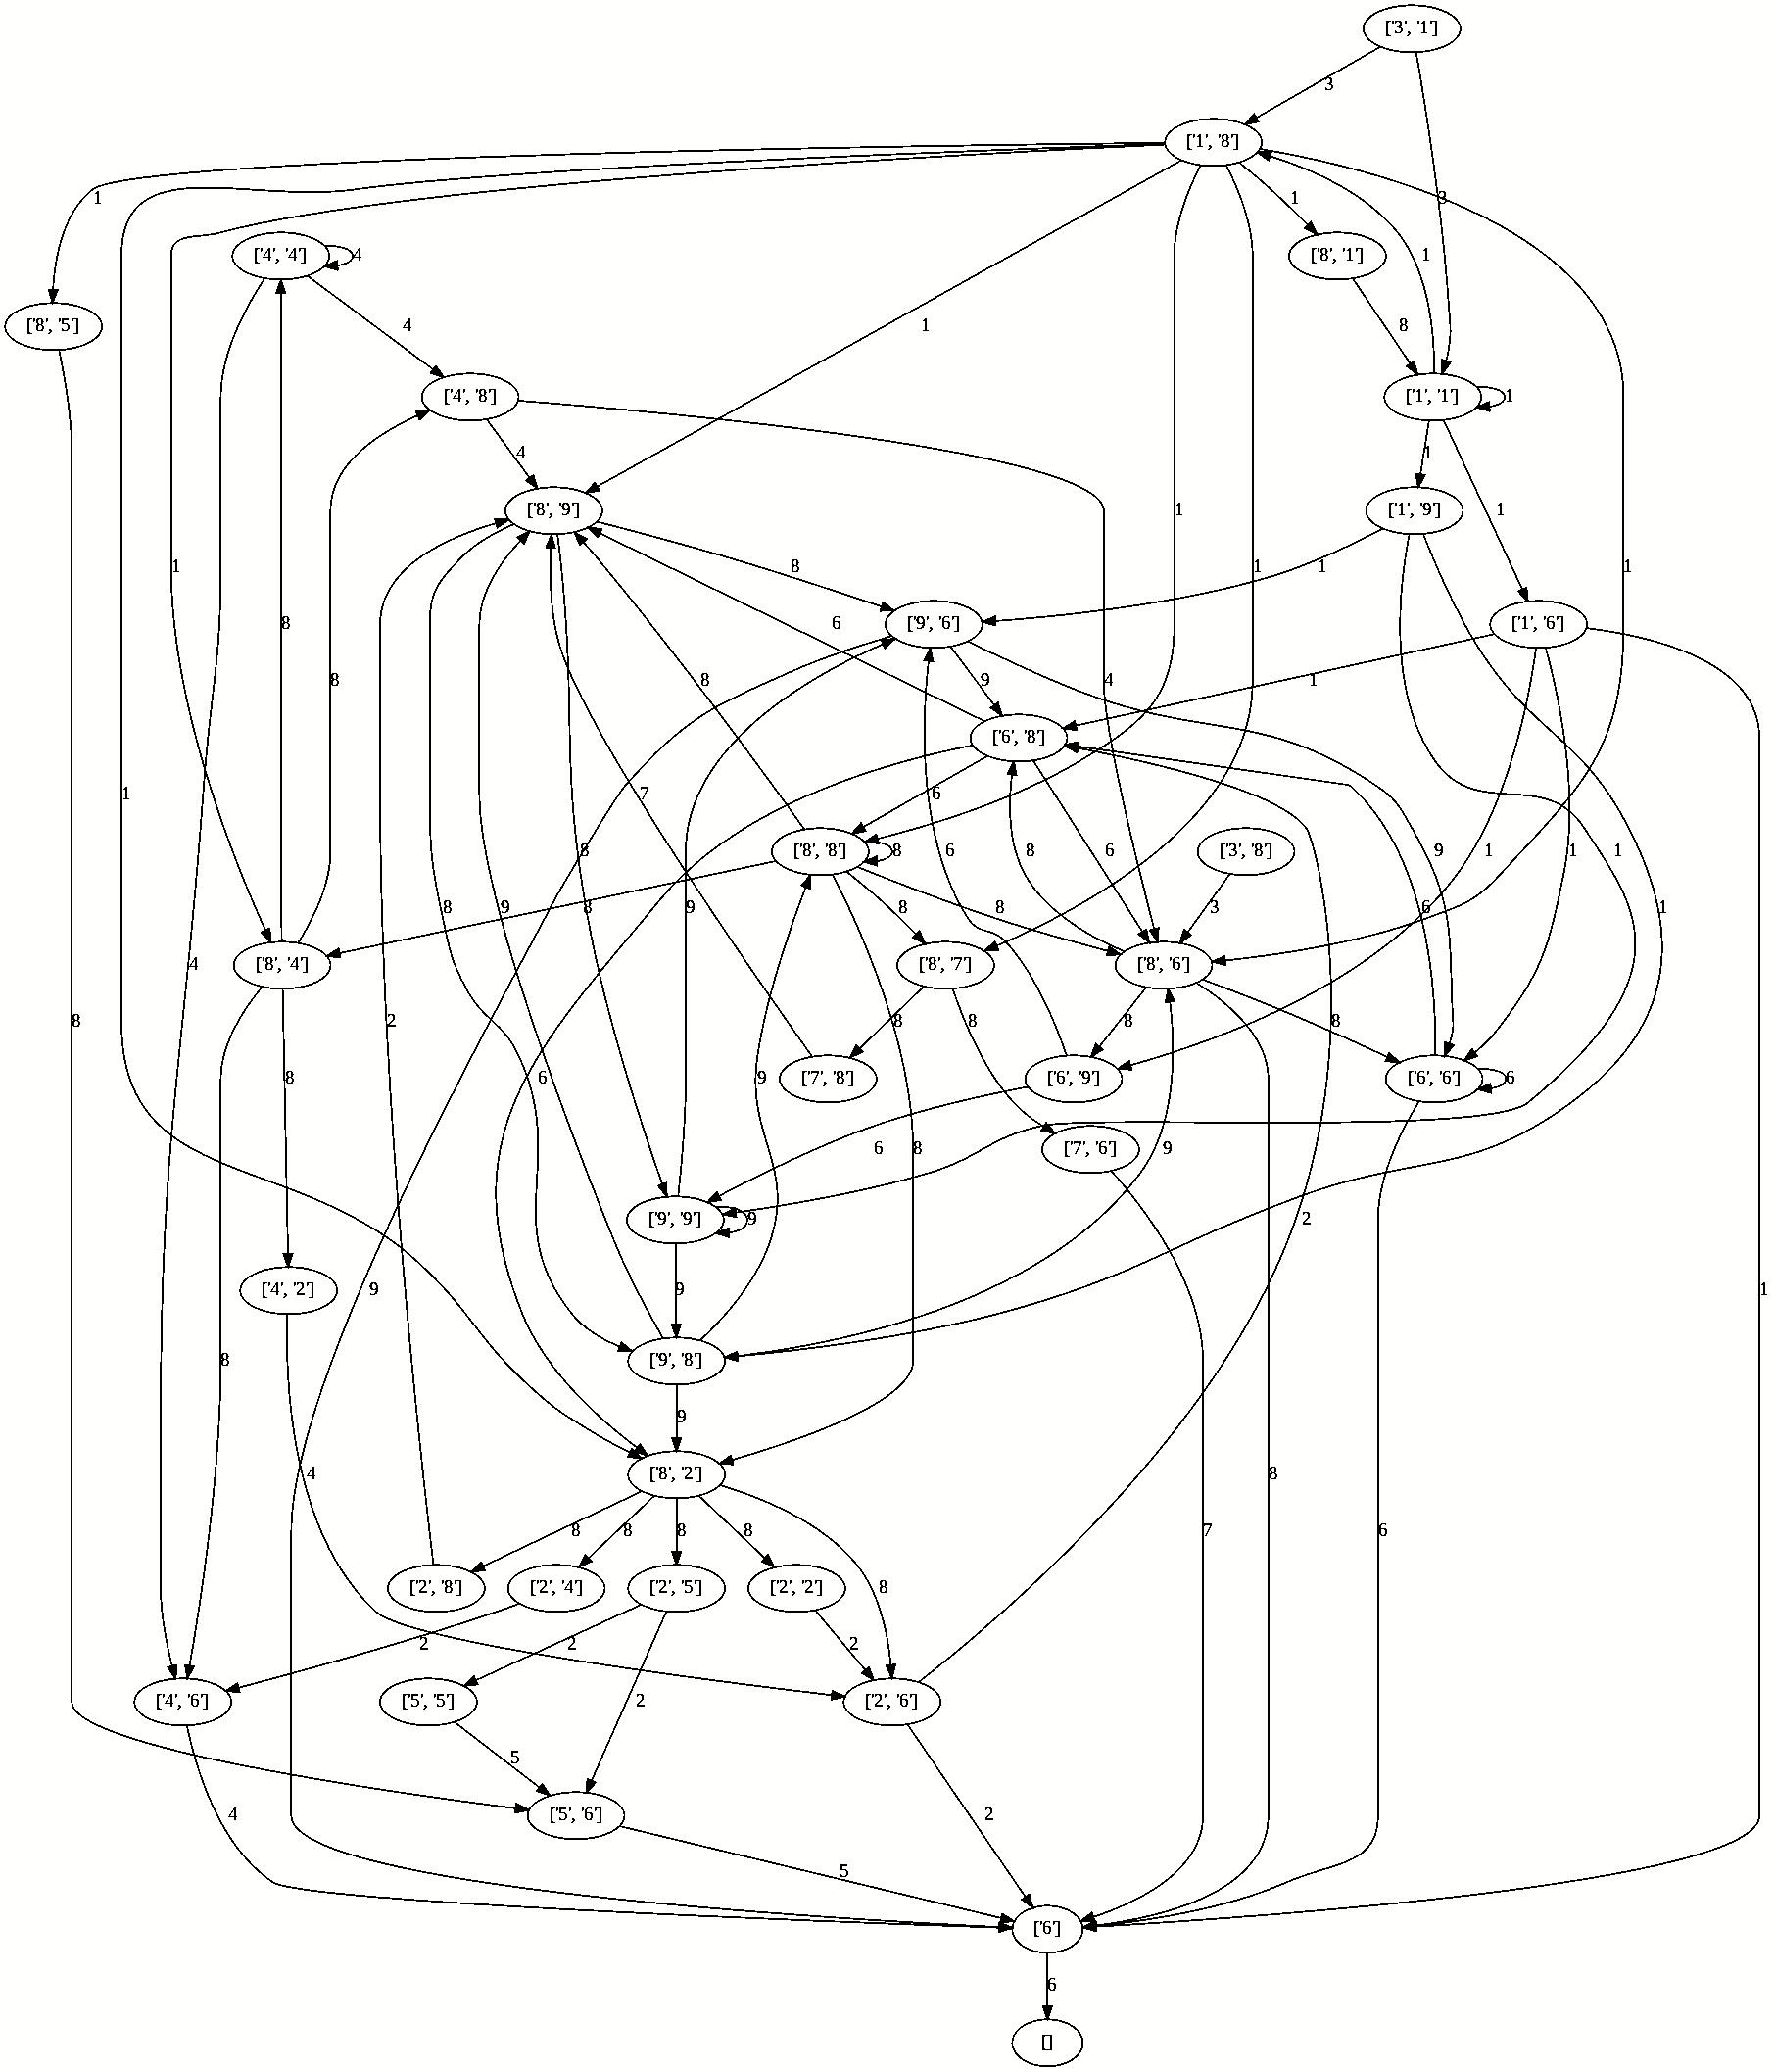

In [48]:
ts = ts_discovery.apply(log)
viz = ts_vis.apply(ts, parameters={ts_vis.Variants.VIEW_BASED.value.Parameters.FORMAT: "jpeg"})
ts_vis.view(viz)
ts_vis.save(viz,"transition_system.jpg")